In [9]:
#import torch
from sklearn.datasets import load_svmlight_file
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score,f1_score,roc_curve,roc_auc_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib as mpl
import requests

mpl.rc('axes', labelsize=8)
mpl.rc('xtick', labelsize=7)
mpl.rc('ytick', labelsize=7)
mpl.rc('figure', dpi=270)

In [10]:
# loading dataset
source = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale"
callout = requests.get(source)
data = callout.text.split('\n')

# Transforming to a dataframe
column_names = ['Label'] + [f'Feature_{i}' for i in range(1, 9)]
df_diab = pd.DataFrame(columns=column_names)

for line in data:
    columns = line.strip().split(' ')
    row = [columns[0]]

    for i in range(1, 9):
        feature_value = columns[i].split(':') if len(columns) > i else ['0', '0']
        row.append(float(feature_value[1]) if len(feature_value) == 2 else np.nan)

    df_diab.loc[len(df_diab)] = row

df_diab = df_diab.fillna(df_diab.mean())
df_diab = df_diab[:-1]
print(df_diab)

    Label  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0      -1  -0.294118   0.487437   0.180328  -0.292929  -1.000000   0.001490   
1      +1  -0.882353  -0.145729   0.081967  -0.414141  -1.000000  -0.207153   
2      -1  -0.058824   0.839196   0.049180  -1.000000  -1.000000  -0.305514   
3      +1  -0.882353  -0.105528   0.081967  -0.535354  -0.777778  -0.162444   
4      -1  -1.000000   0.376884  -0.344262  -0.292929  -0.602837   0.284650   
..    ...        ...        ...        ...        ...        ...        ...   
763    +1   0.176471   0.015075   0.245902  -0.030303  -0.574468  -0.019374   
764    +1  -0.764706   0.226131   0.147541  -0.454545  -1.000000   0.096870   
765    +1  -0.411765   0.216080   0.180328  -0.535354  -0.735225  -0.219076   
766    -1  -0.882353   0.266332  -0.016393  -1.000000  -1.000000  -0.102832   
767    +1  -0.882353  -0.065327   0.147541  -0.373737  -1.000000  -0.093890   

     Feature_7  Feature_8  
0    -0.531170  -0.0333

/var/folders/d7/ws_j0w7s5fddwxs6dv1374lw0000gn/T/ipykernel_29305/1506393510.py:20: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_diab = df_diab.fillna(df_diab.mean())


In [11]:
df_diab.head()

,Label,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,+1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,+1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


In [12]:
# Rename columns
df_diab.rename(columns={'Label': 'Label', 'Feature_1': 'Pregnancies','Feature_2': 'Glucose', 
                   'Feature_3': 'BloodPressure', 'Feature_4': 'SkinThickness', 'Feature_5': 'Insulin',
                   'Feature_6': 'BMI', 'Feature_7': 'DiabetesPedigree', 'Feature_8': 'Age', 'Feature_9': 'Outcome'},
                   inplace=True)

# Display the updated DataFrame
print(df_diab)

    Label  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0      -1    -0.294118  0.487437       0.180328      -0.292929 -1.000000   
1      +1    -0.882353 -0.145729       0.081967      -0.414141 -1.000000   
2      -1    -0.058824  0.839196       0.049180      -1.000000 -1.000000   
3      +1    -0.882353 -0.105528       0.081967      -0.535354 -0.777778   
4      -1    -1.000000  0.376884      -0.344262      -0.292929 -0.602837   
..    ...          ...       ...            ...            ...       ...   
763    +1     0.176471  0.015075       0.245902      -0.030303 -0.574468   
764    +1    -0.764706  0.226131       0.147541      -0.454545 -1.000000   
765    +1    -0.411765  0.216080       0.180328      -0.535354 -0.735225   
766    -1    -0.882353  0.266332      -0.016393      -1.000000 -1.000000   
767    +1    -0.882353 -0.065327       0.147541      -0.373737 -1.000000   

          BMI  DiabetesPedigree       Age  
0    0.001490         -0.531170 -0.033333  

In [13]:
# ax = sns.countplot(cancer_df.label,label="Count")
df_diab['Label'] = df_diab['Label'].astype(int)
df_diab['Label'] = df_diab['Label'].replace(-1, 0)

1    500
0    268
Name: Label, dtype: int64


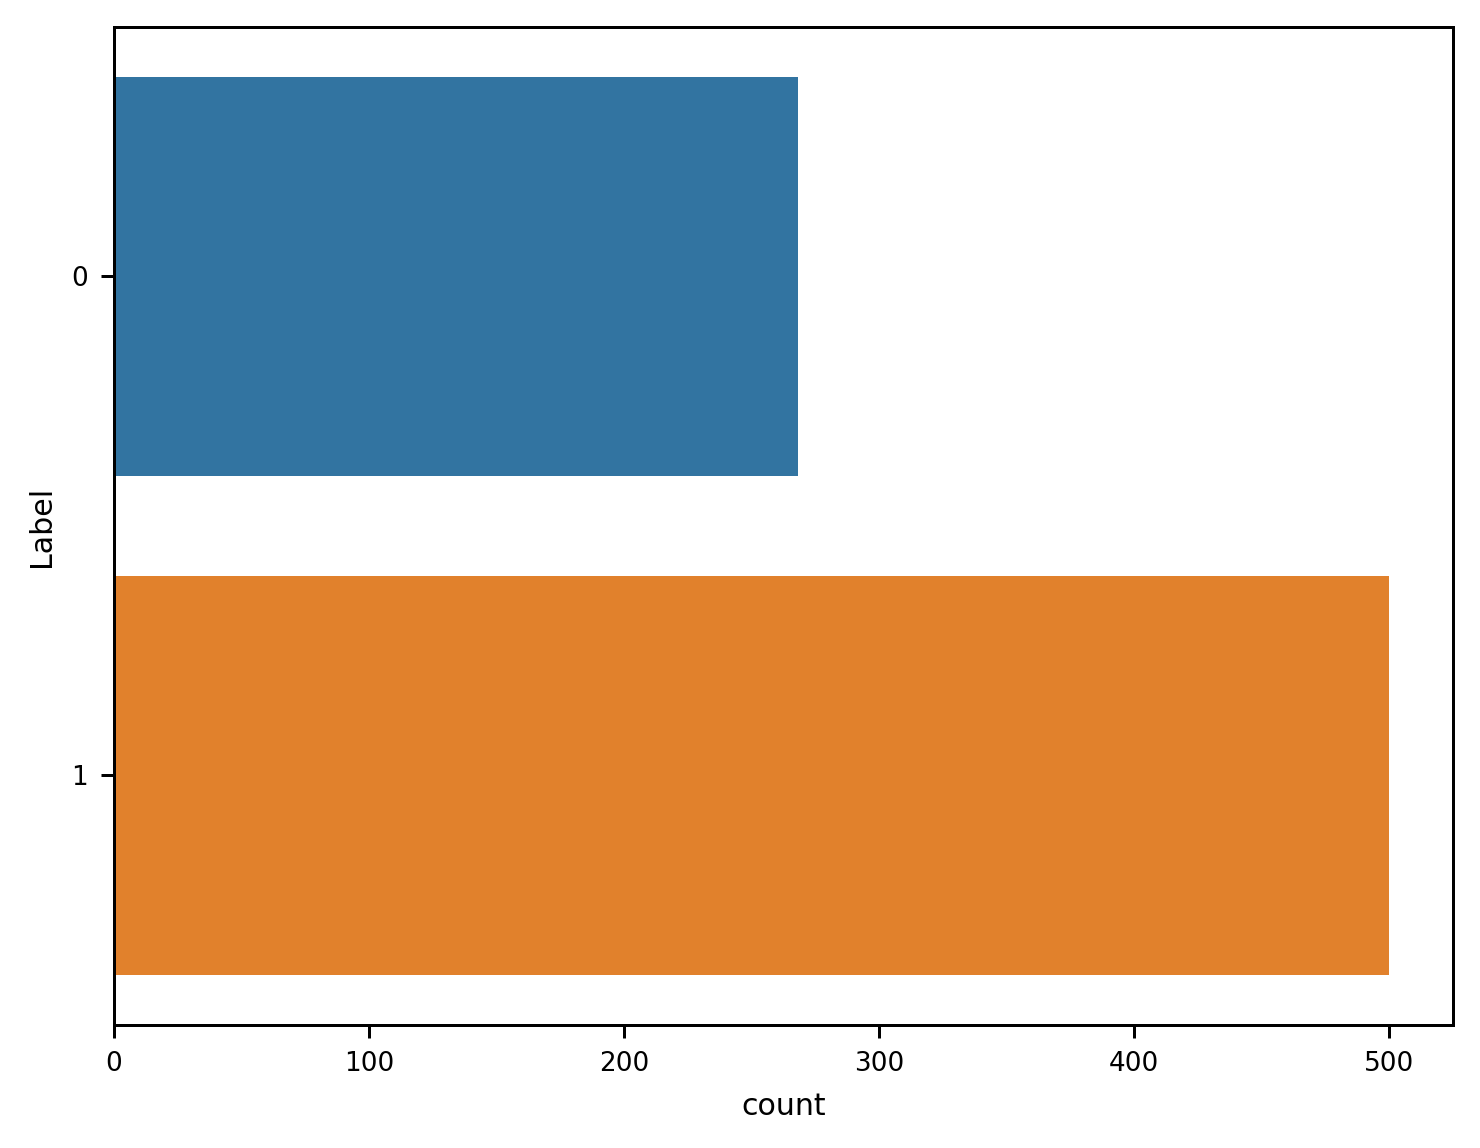

In [15]:
print(df_diab['Label'].value_counts())
ax = sns.countplot(data = df_diab, y = df_diab["Label"],label="Count")

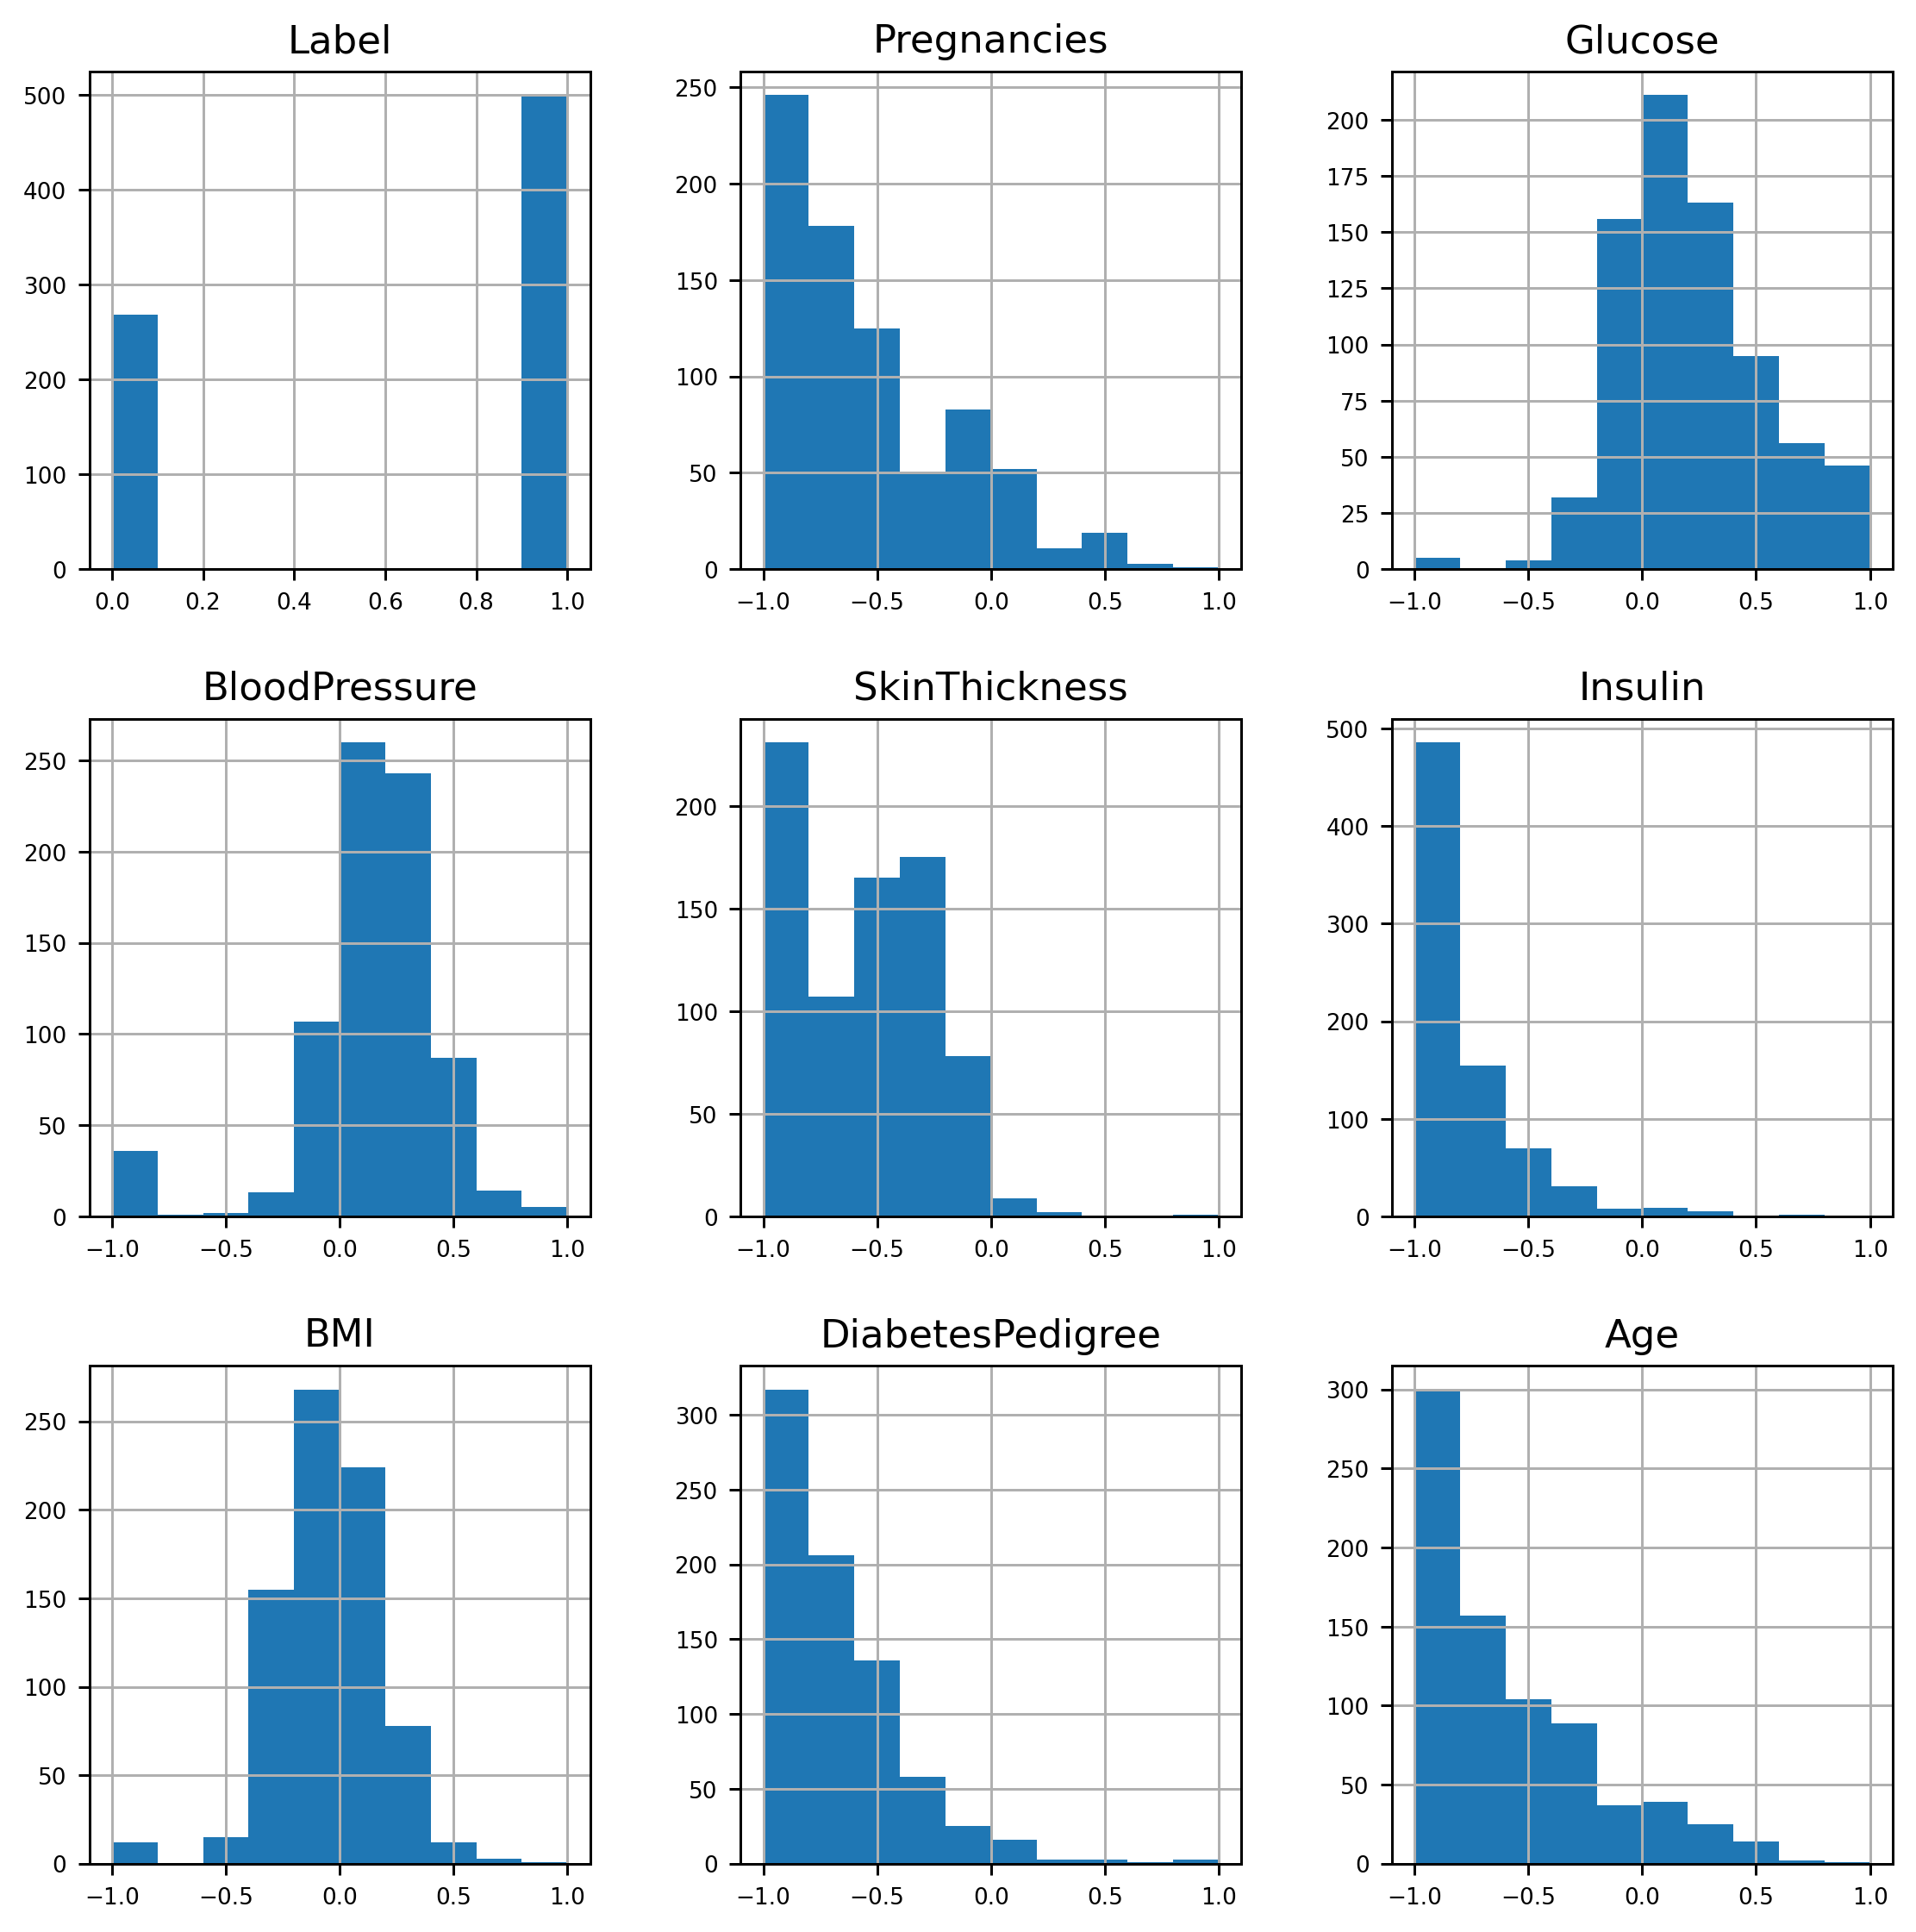

In [17]:
df_diab.hist(figsize = (10,10))
plt.show()

## Implementation of Perceptron

In [19]:
#load the dataset
diabetes_data = load_svmlight_file("dataset.txt")

# seperate into feature and label
given_features = diabetes_data[0]
given_labels = diabetes_data[1]

In [20]:
# size of the features
print(given_features.shape)
# size of the labels
print(given_labels.shape)

(768, 8)
(768,)


In [21]:
print(type(given_features))
print(given_features)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 0)	-0.294118
  (0, 1)	0.487437
  (0, 2)	0.180328
  (0, 3)	-0.292929
  (0, 4)	-1.0
  (0, 5)	0.00149028
  (0, 6)	-0.53117
  (0, 7)	-0.0333333
  (1, 0)	-0.882353
  (1, 1)	-0.145729
  (1, 2)	0.0819672
  (1, 3)	-0.414141
  (1, 4)	-1.0
  (1, 5)	-0.207153
  (1, 6)	-0.766866
  (1, 7)	-0.666667
  (2, 0)	-0.0588235
  (2, 1)	0.839196
  (2, 2)	0.0491803
  (2, 3)	-1.0
  (2, 4)	-1.0
  (2, 5)	-0.305514
  (2, 6)	-0.492741
  (2, 7)	-0.633333
  (3, 0)	-0.882353
  :	:
  (764, 7)	-0.8
  (765, 0)	-0.411765
  (765, 1)	0.21608
  (765, 2)	0.180328
  (765, 3)	-0.535354
  (765, 4)	-0.735225
  (765, 5)	-0.219076
  (765, 6)	-0.857387
  (765, 7)	-0.7
  (766, 0)	-0.882353
  (766, 1)	0.266332
  (766, 2)	-0.0163934
  (766, 3)	-1.0
  (766, 4)	-1.0
  (766, 5)	-0.102832
  (766, 6)	-0.768574
  (766, 7)	-0.133333
  (767, 0)	-0.882353
  (767, 1)	-0.0653266
  (767, 2)	0.147541
  (767, 3)	-0.373737
  (767, 4)	-1.0
  (767, 5)	-0.0938897
  (767, 6)	-0.797609
  (767, 7)	-0.933333


In [22]:
# convert feature into numpy array
features_final = given_features.toarray()
labels_final = given_labels
features_final

array([[-0.294118  ,  0.487437  ,  0.180328  , ...,  0.00149028,
        -0.53117   , -0.0333333 ],
       [-0.882353  , -0.145729  ,  0.0819672 , ..., -0.207153  ,
        -0.766866  , -0.666667  ],
       [-0.0588235 ,  0.839196  ,  0.0491803 , ..., -0.305514  ,
        -0.492741  , -0.633333  ],
       ...,
       [-0.411765  ,  0.21608   ,  0.180328  , ..., -0.219076  ,
        -0.857387  , -0.7       ],
       [-0.882353  ,  0.266332  , -0.0163934 , ..., -0.102832  ,
        -0.768574  , -0.133333  ],
       [-0.882353  , -0.0653266 ,  0.147541  , ..., -0.0938897 ,
        -0.797609  , -0.933333  ]])

In [23]:
print("Size of the features:",features_final.shape," \nSize of the labels:",labels_final.shape)

Size of the features: (768, 8)  
Size of the labels: (768,)


In [24]:
# initiate a weight:

np.random.seed(75) # Set a random seed for reproducibility
weights=np.random.rand(8)
initial_weights = weights.copy() # Initialize weights with random values

In [26]:
def predict(row, weights):
    activation = np.dot(weights, row)
    return np.sign(activation)

def calculate_accuracy(predictions, actual):
    correct_predictions = np.sum(predictions == actual)
    accuracy = correct_predictions / len(actual)
    return accuracy

def update_weights(features_final, labels_final, weights):
    learning_rate = 0.001
    predictions = np.sign(np.dot(features_final, weights))
    misclassified = labels_final * predictions <= 0
    gradient = np.dot(features_final.T, misclassified * labels_final)
    weights += learning_rate * gradient
    return weights

In [27]:
best_accuracy = 0
best_weights = None

for epoch in range(20):
    predictions = [predict(row, weights) for row in features_final]
    accuracy = accuracy_score(labels_final, predictions)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_weights = weights
    
    weights = update_weights(features_final, labels_final, weights)

print("Best accuracy after 20 epochs:", best_accuracy)
print("Best weights after 20 epochs:", best_weights)

Best accuracy after 20 epochs: 0.7395833333333334
Best weights after 20 epochs: [-0.07876574 -0.50149797  0.16145486  0.08554663  0.12769901 -0.17355874
 -0.08744025 -0.03753666]


## Performing experiments

In [45]:
def loss_f(feature, weights,label):
    summation_loss =0
    for i, j in zip(feature,label):       
        # summation += i*j
        if (j *(np.dot(i,weights)))<0:
            summation_loss += 1
        else:
            summation_loss += 0 
            
    return (summation_loss/len(label))

In [29]:
# Split the dataset into training, validation, and test sets without bias
train_features, test_features, train_labels, test_labels = train_test_split(
    features_final, labels_final, test_size=0.2, random_state=42, stratify=labels_final
)

train_features, val_features, train_labels, val_labels = train_test_split(
    train_features, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

print(
    "Train Features:", train_features.shape,
    "Validation Features:", val_features.shape,
    "Test Features:", test_features.shape,
    "Train Labels:", train_labels.shape,
    "Validation Labels:", val_labels.shape,
    "Test Labels:", test_labels.shape,
)

Train Features: (491, 8) Validation Features: (123, 8) Test Features: (154, 8) Train Labels: (491,) Validation Labels: (123,) Test Labels: (154,)


## Create a baseline of the model

In [31]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a baseline Perceptron model
perceptron_baseline = Perceptron(tol=1e-3, random_state=42)
perceptron_baseline.fit(train_features, train_labels)

# Make predictions on the test set
predictions = perceptron_baseline.predict(test_features)

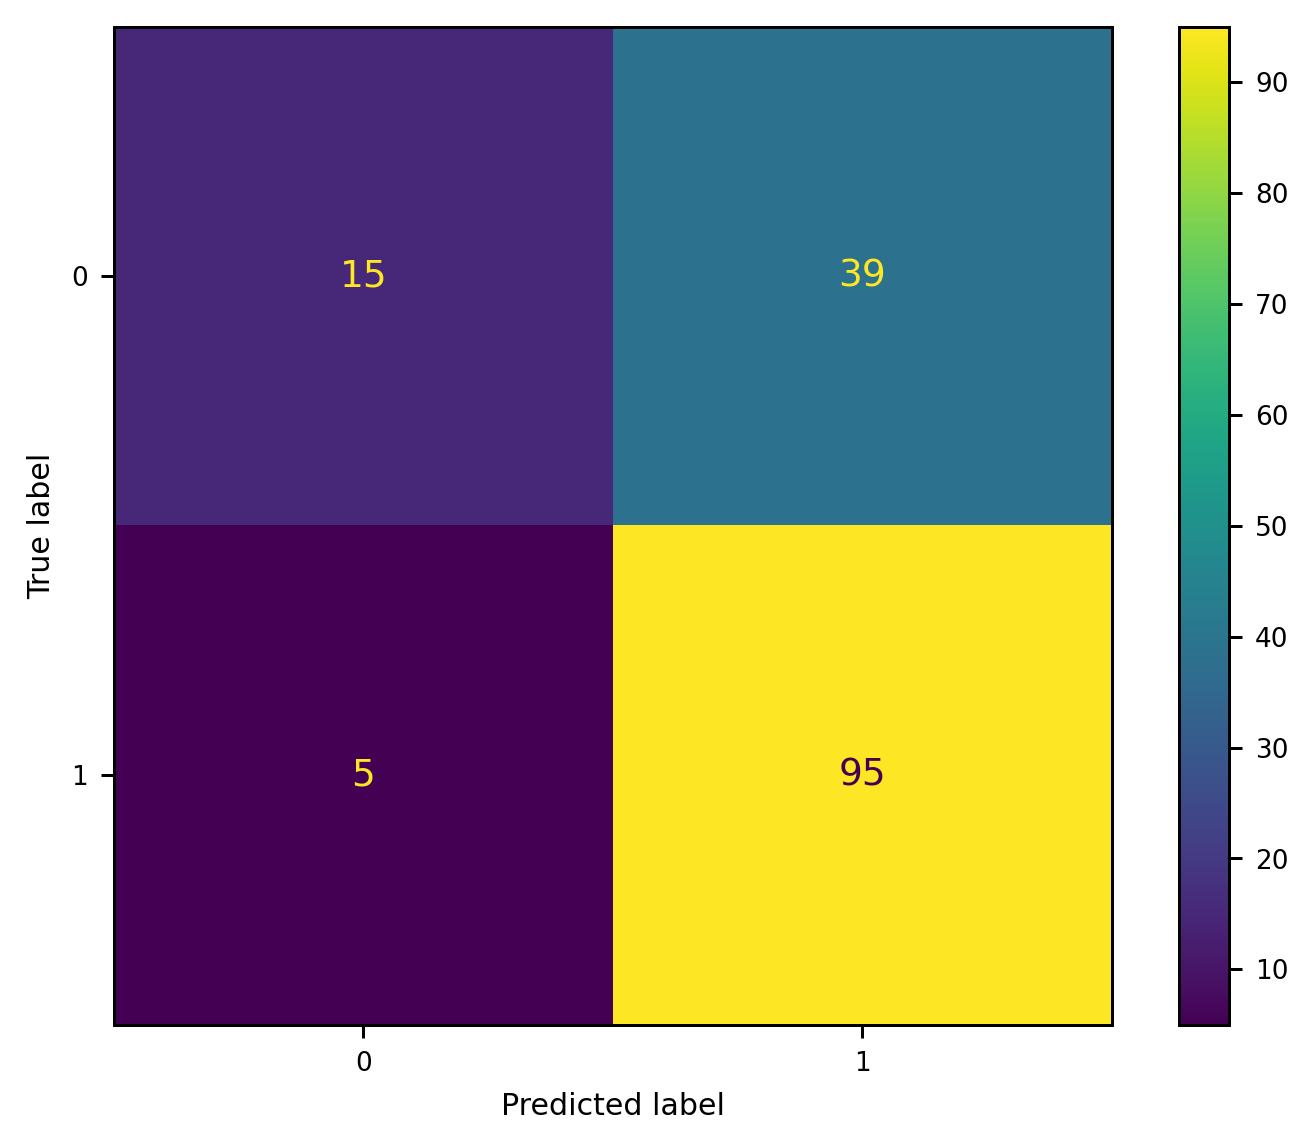

In [33]:
# Calculate the confusion matrix
cm_baseline = confusion_matrix(test_labels, predictions)

# Display the confusion matrix
cm_display_baseline = ConfusionMatrixDisplay(cm_baseline)
cm_display_baseline.plot()
plt.show()

In [34]:
# Calculate precision, recall, and balanced accuracy
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
balanced_accuracy = balanced_accuracy_score(test_labels, predictions)

# Calculate sensitivity and specificity
true_positive = cm_baseline[1, 1]
false_negative = cm_baseline[1, 0]
false_positive = cm_baseline[0, 1]
true_negative = cm_baseline[0, 0]
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

# Calculate accuracy using the Perceptron's built-in method
accuracy = perceptron_baseline.score(test_features, test_labels)

# Print the metrics
print("Baseline Precision:", precision)
print("Baseline Recall:", recall)
print("Baseline Sensitivity:", sensitivity)
print("Baseline Specificity:", specificity)
print("Baseline Accuracy:", accuracy)
print("Baseline Balanced Accuracy:", balanced_accuracy)

Baseline Precision: 0.7089552238805971
Baseline Recall: 0.95
Baseline Sensitivity: 0.95
Baseline Specificity: 0.2777777777777778
Baseline Accuracy: 0.7142857142857143
Baseline Balanced Accuracy: 0.6138888888888889


## Tuning the hyperparameter: learning rate, epoch
----------------------

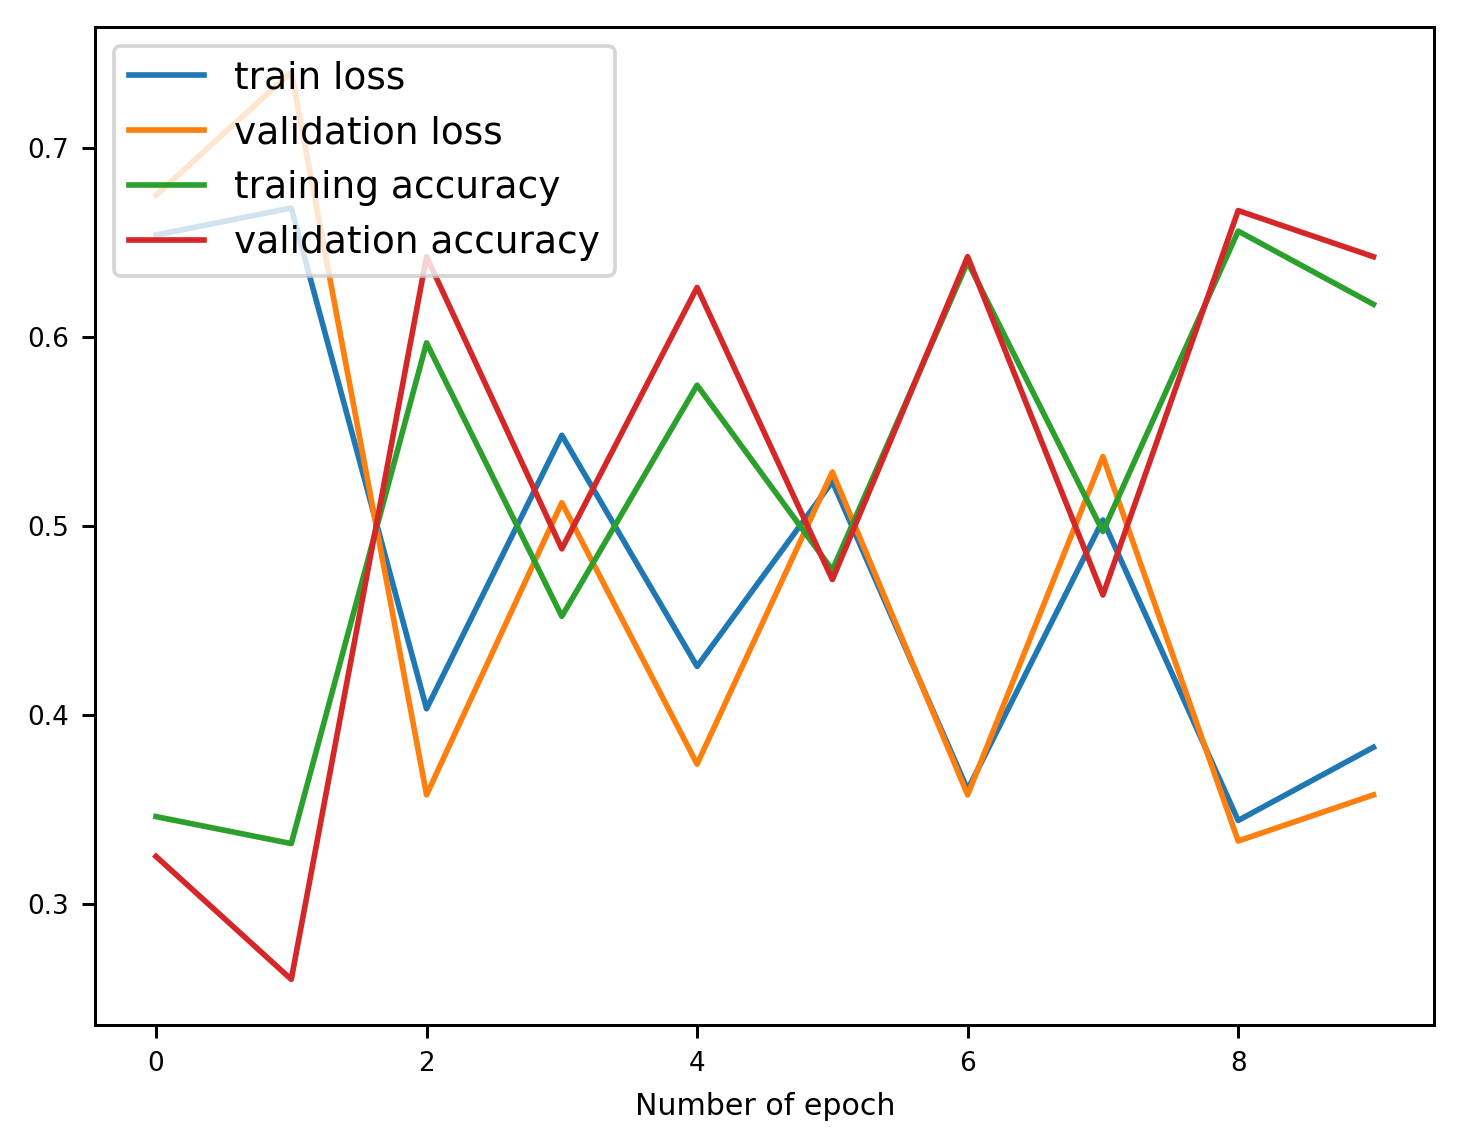

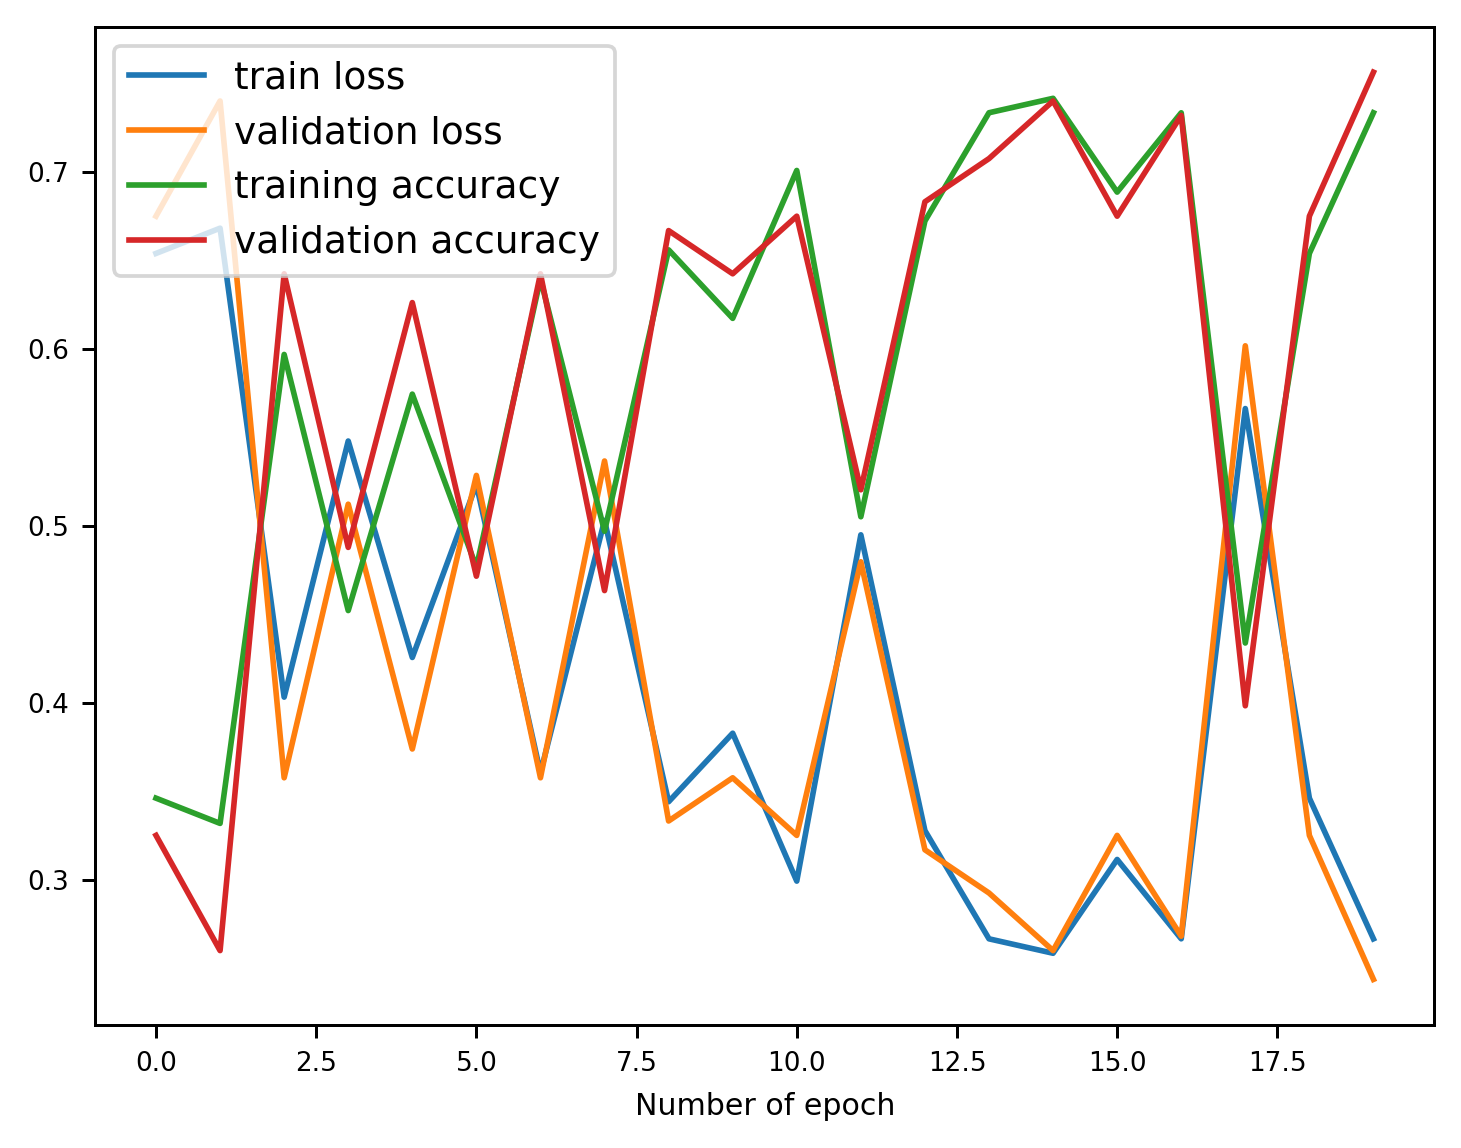

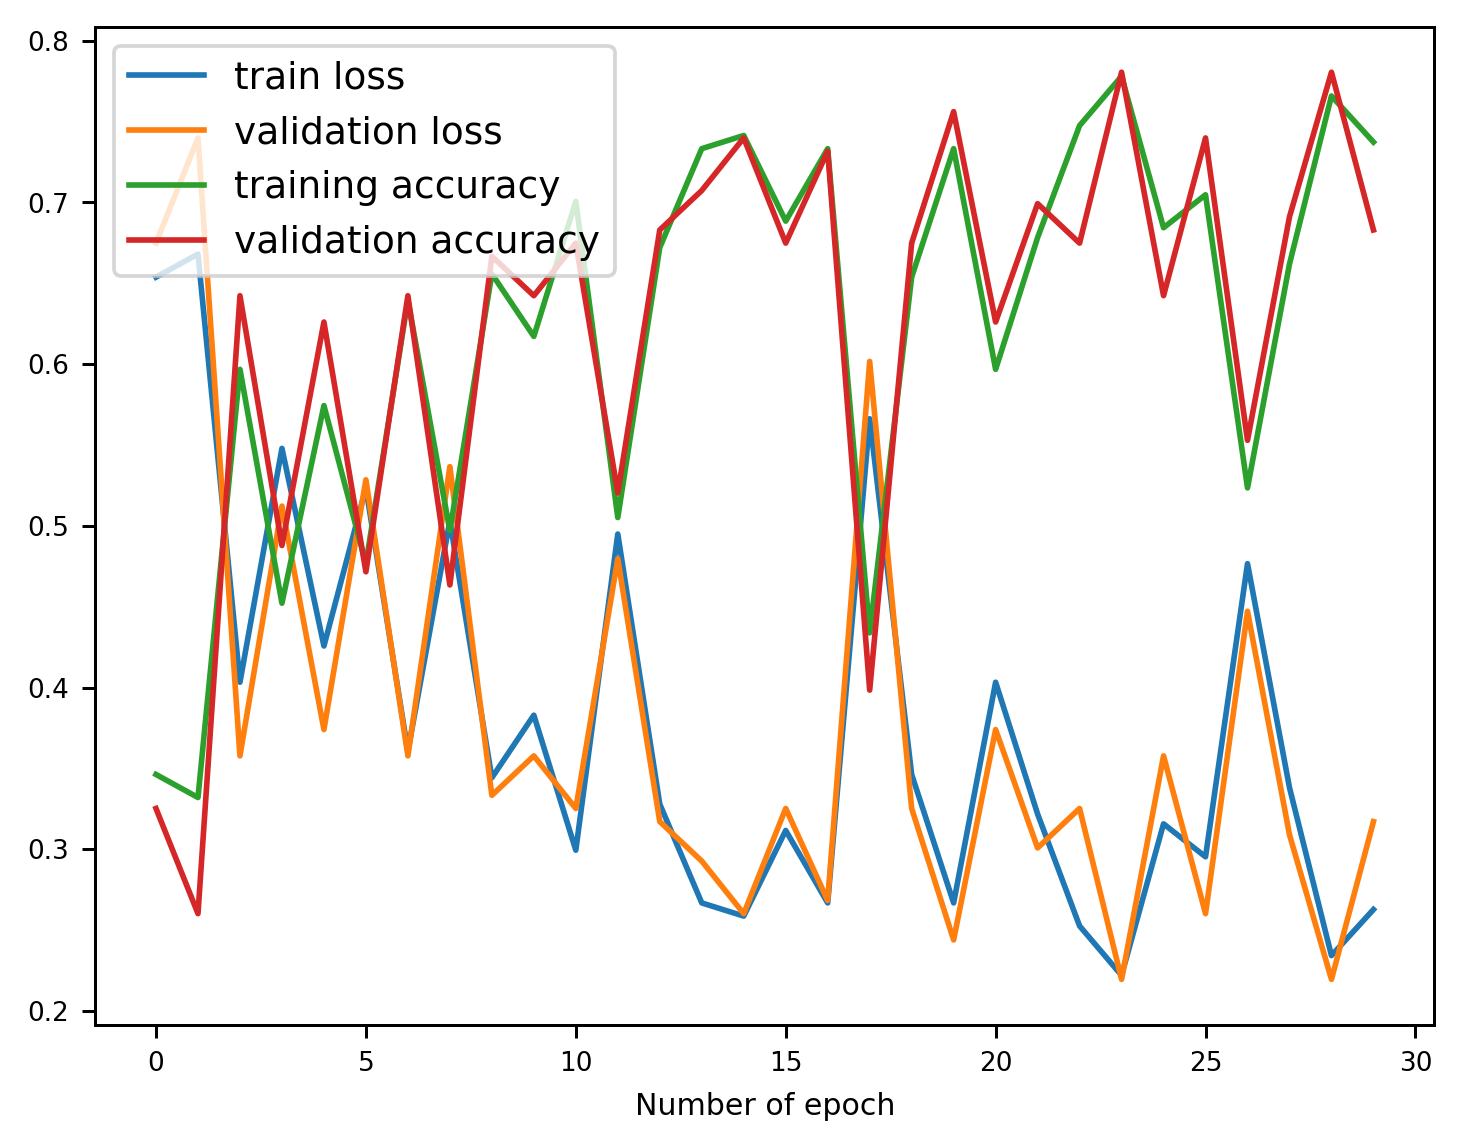

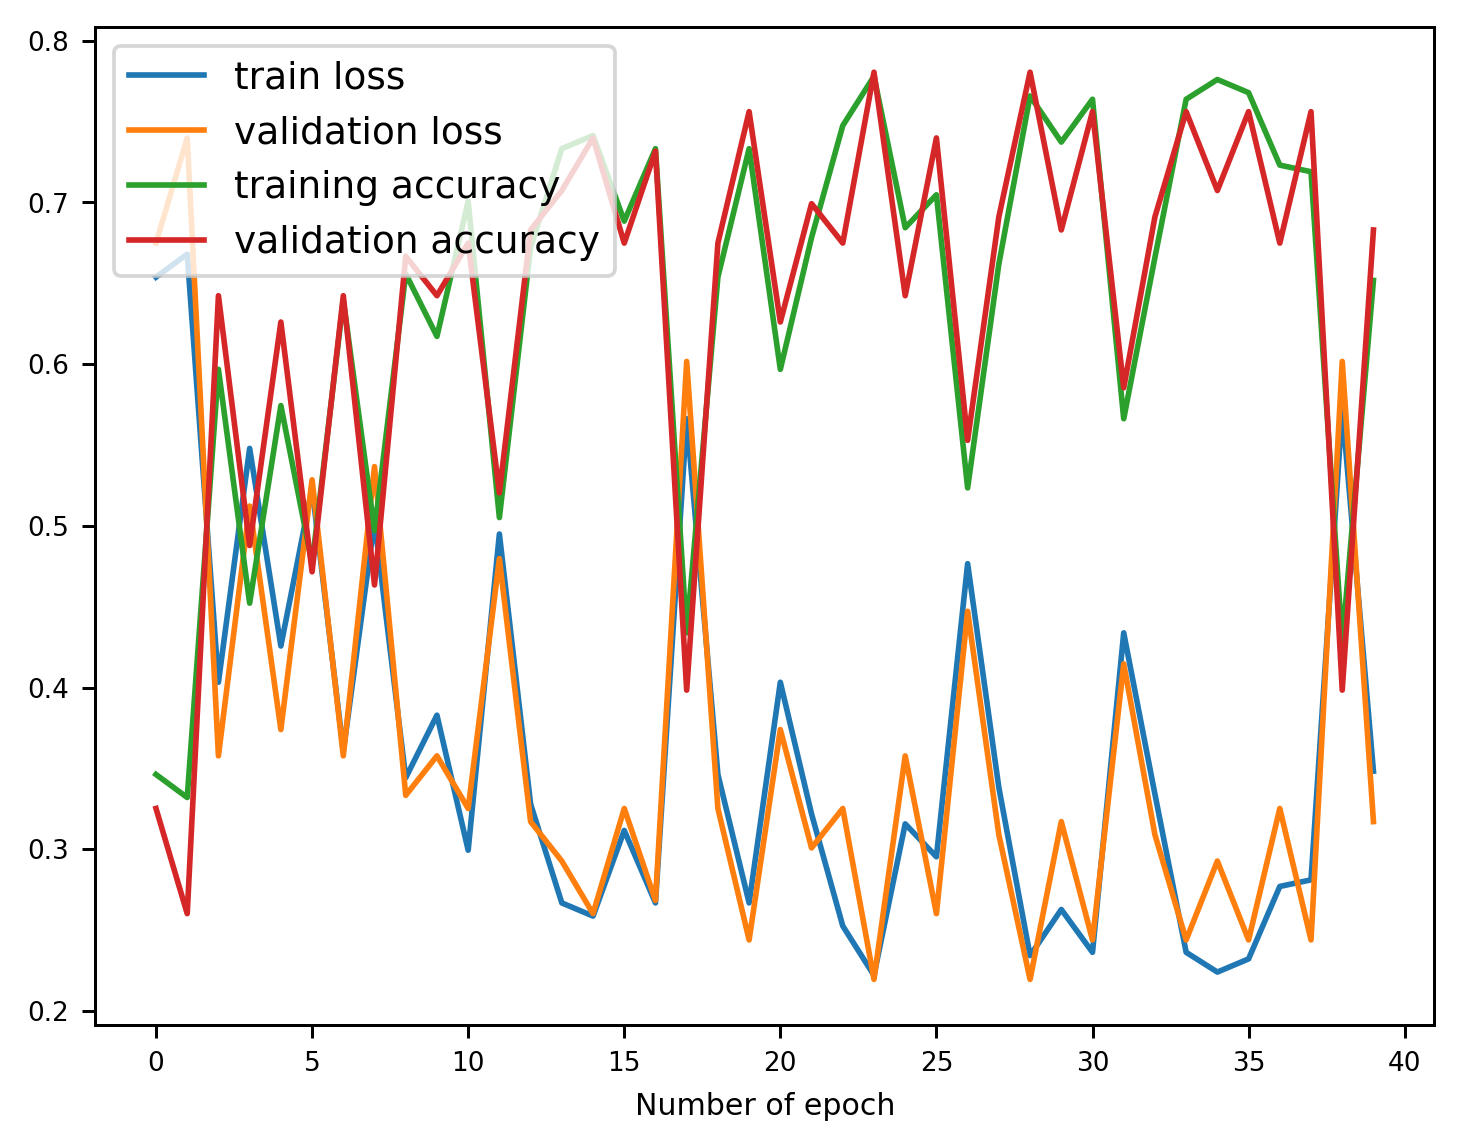

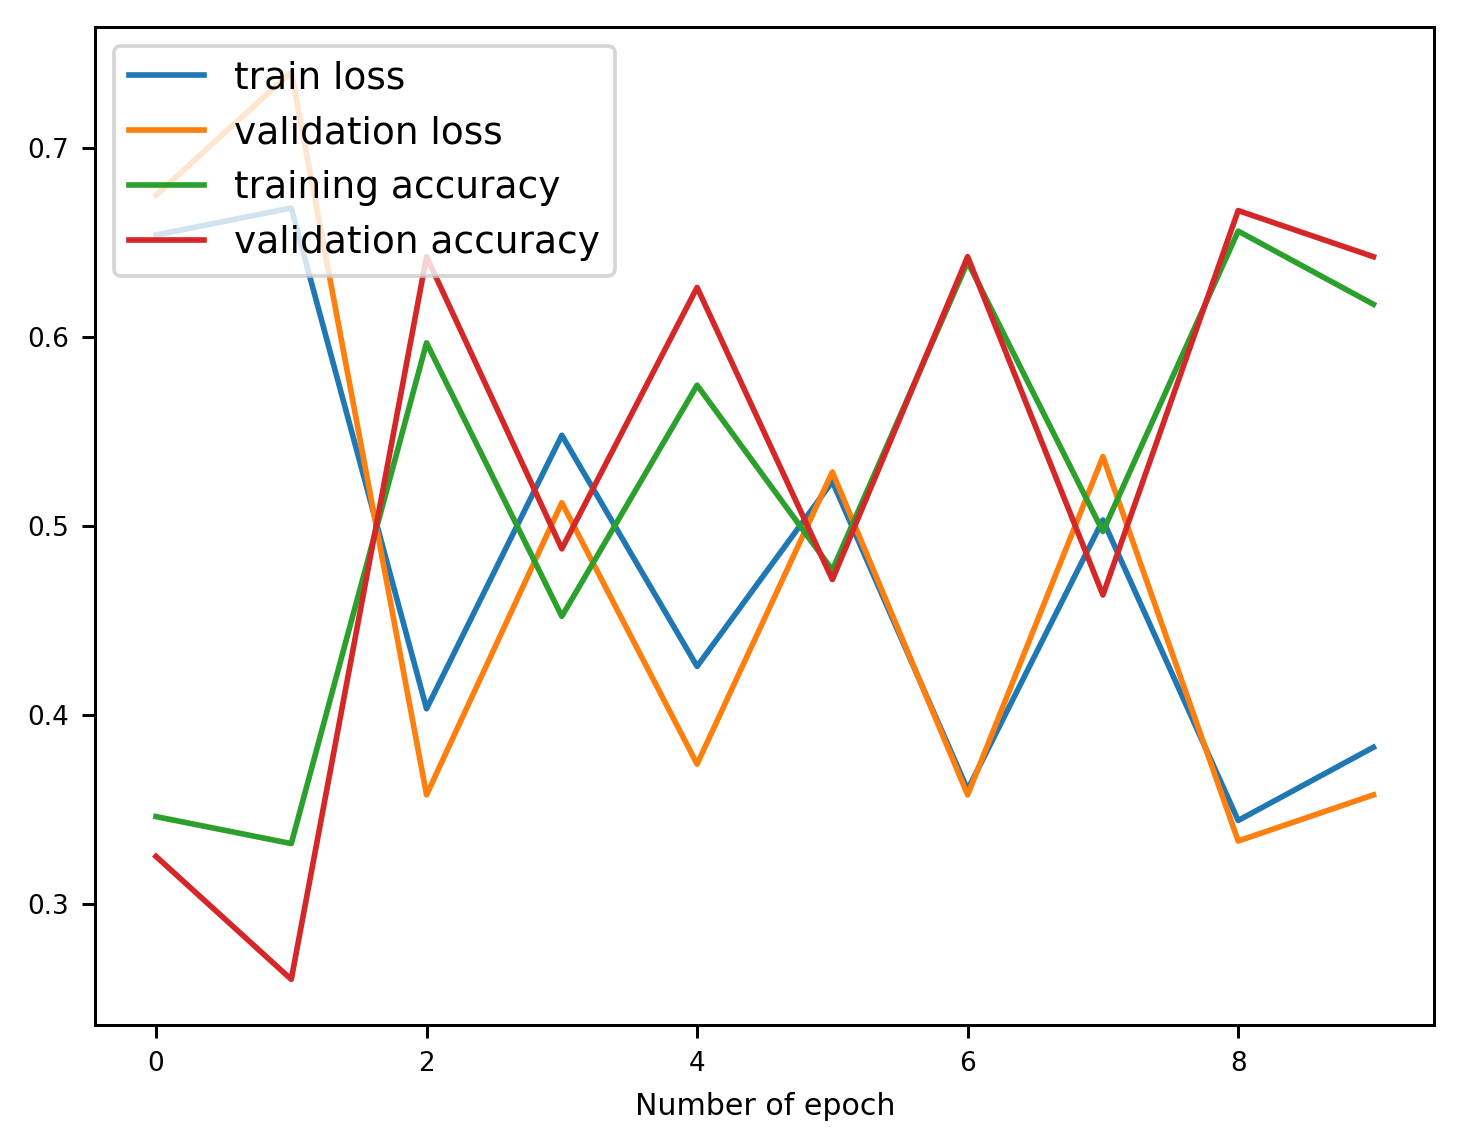

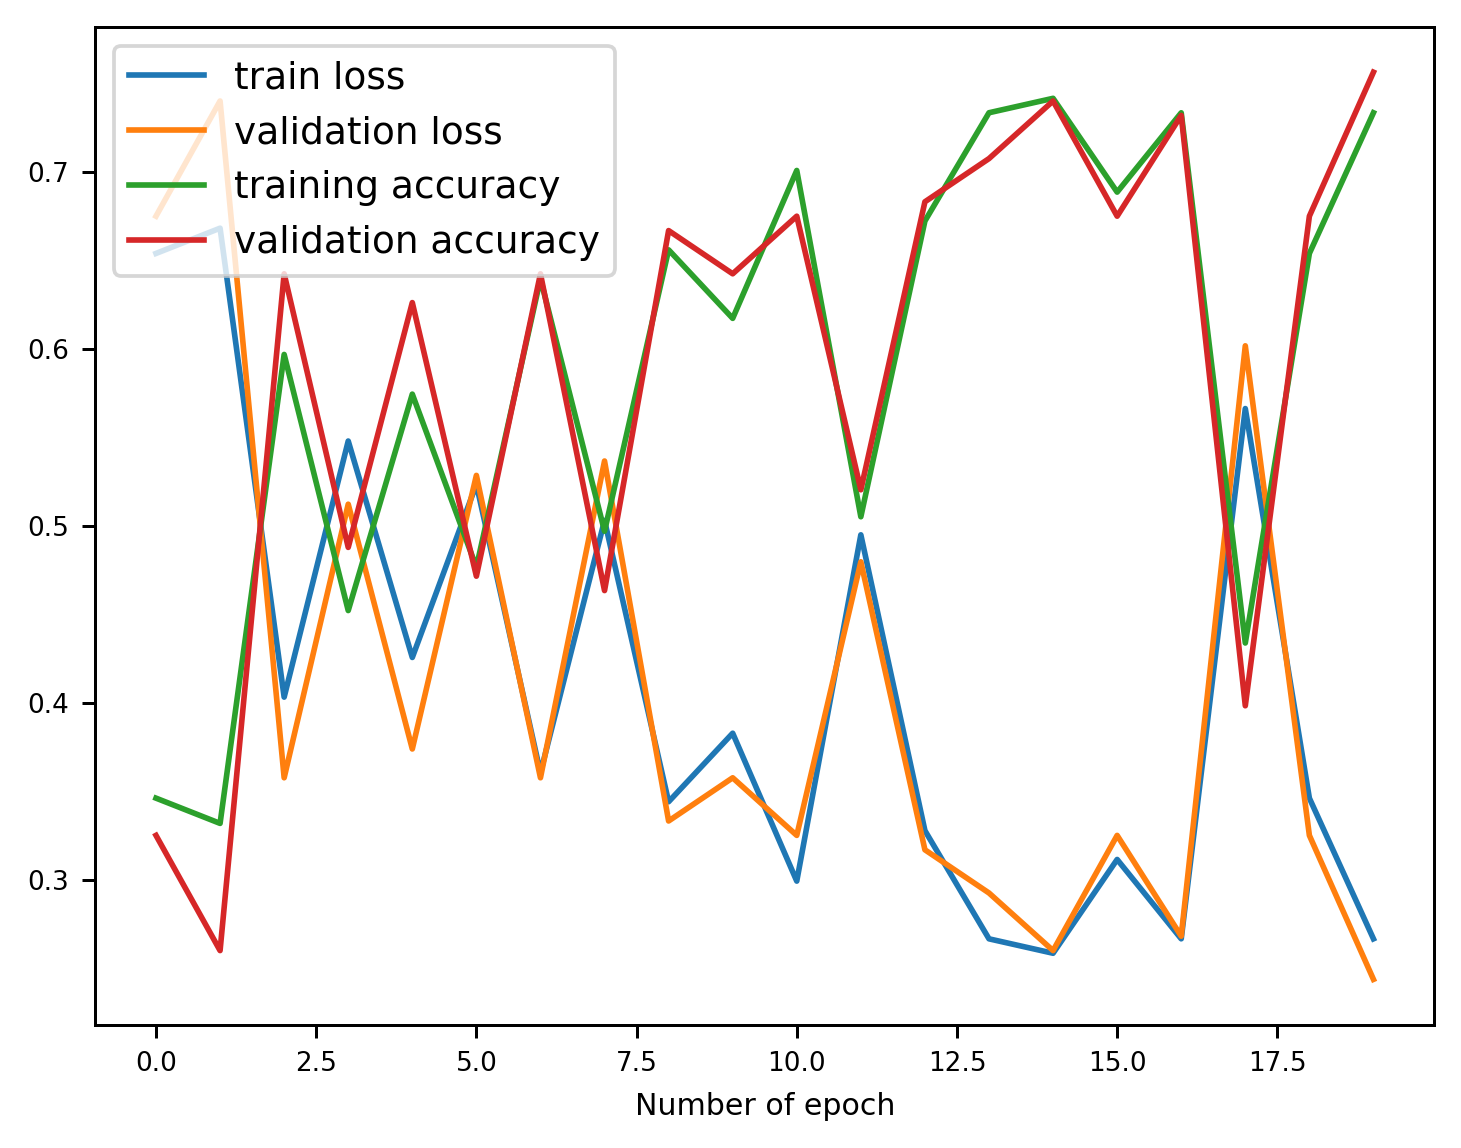

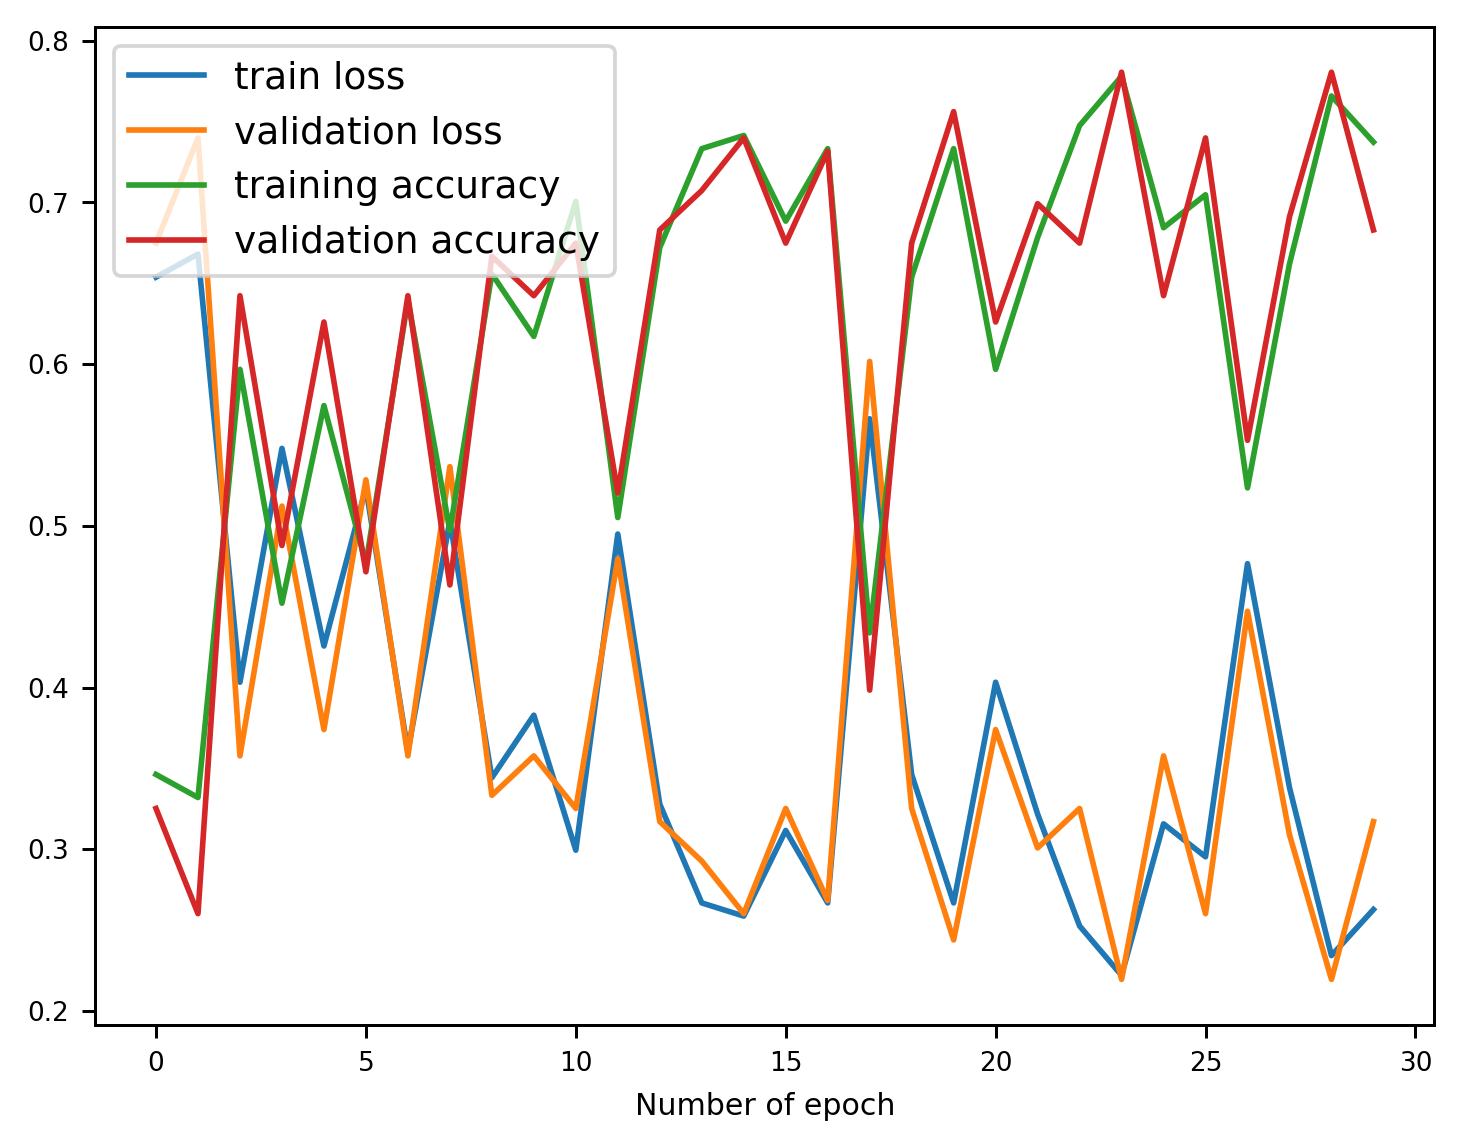

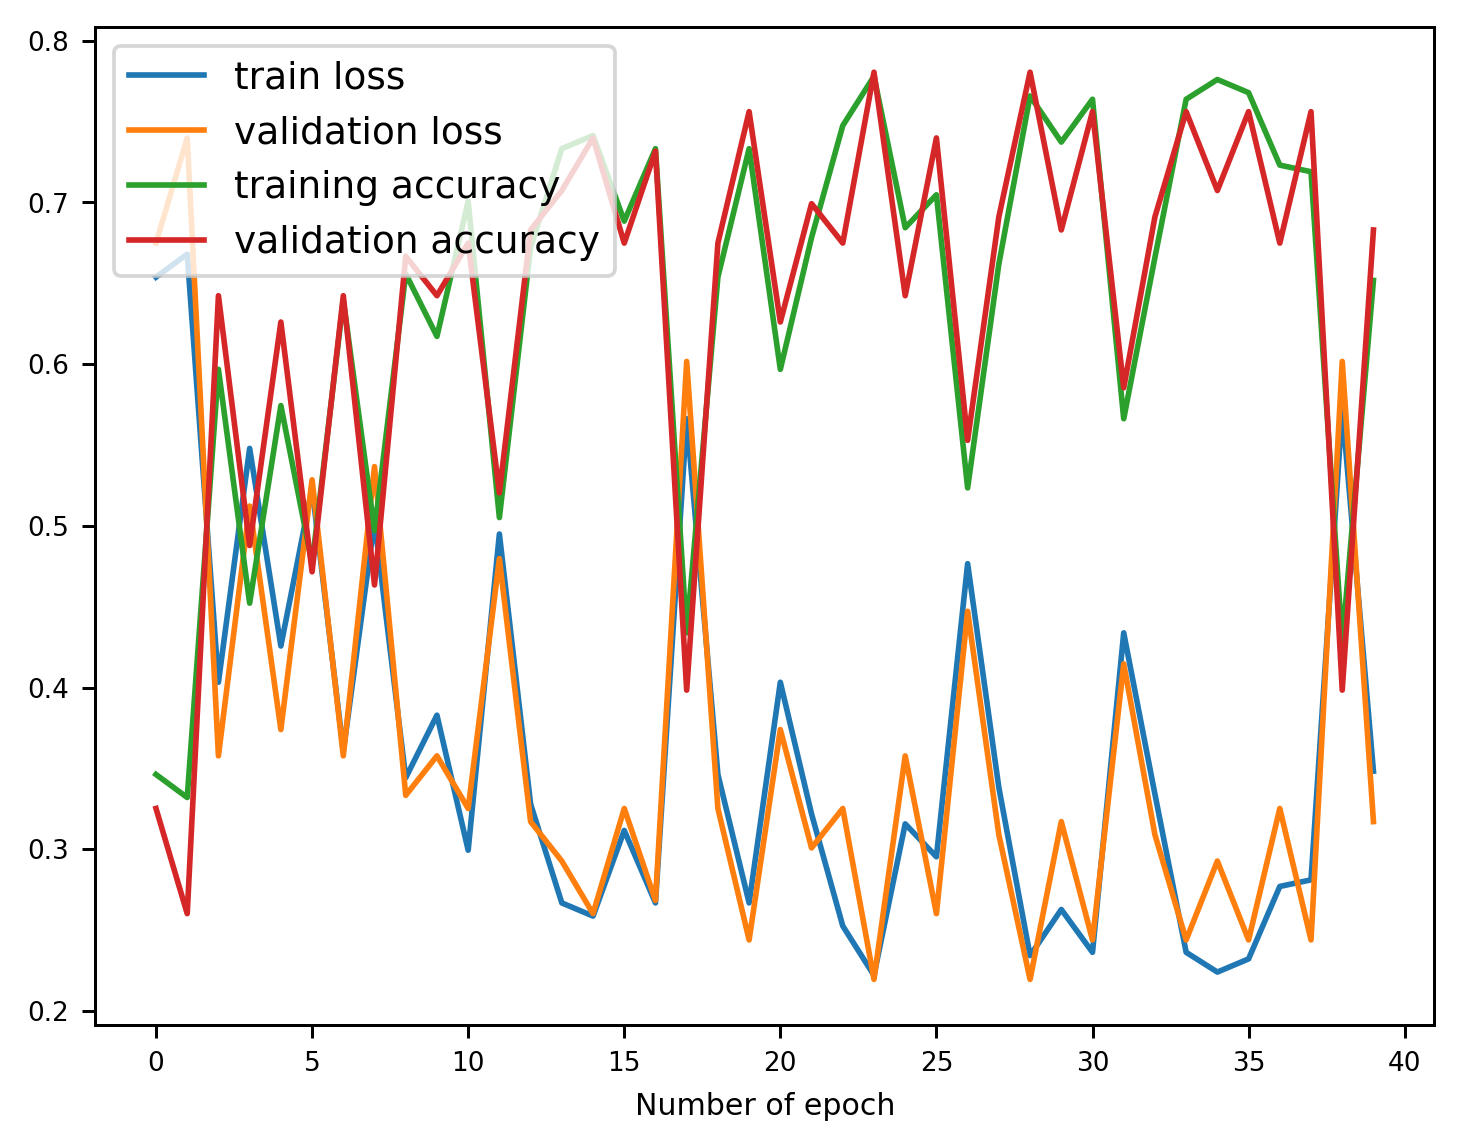

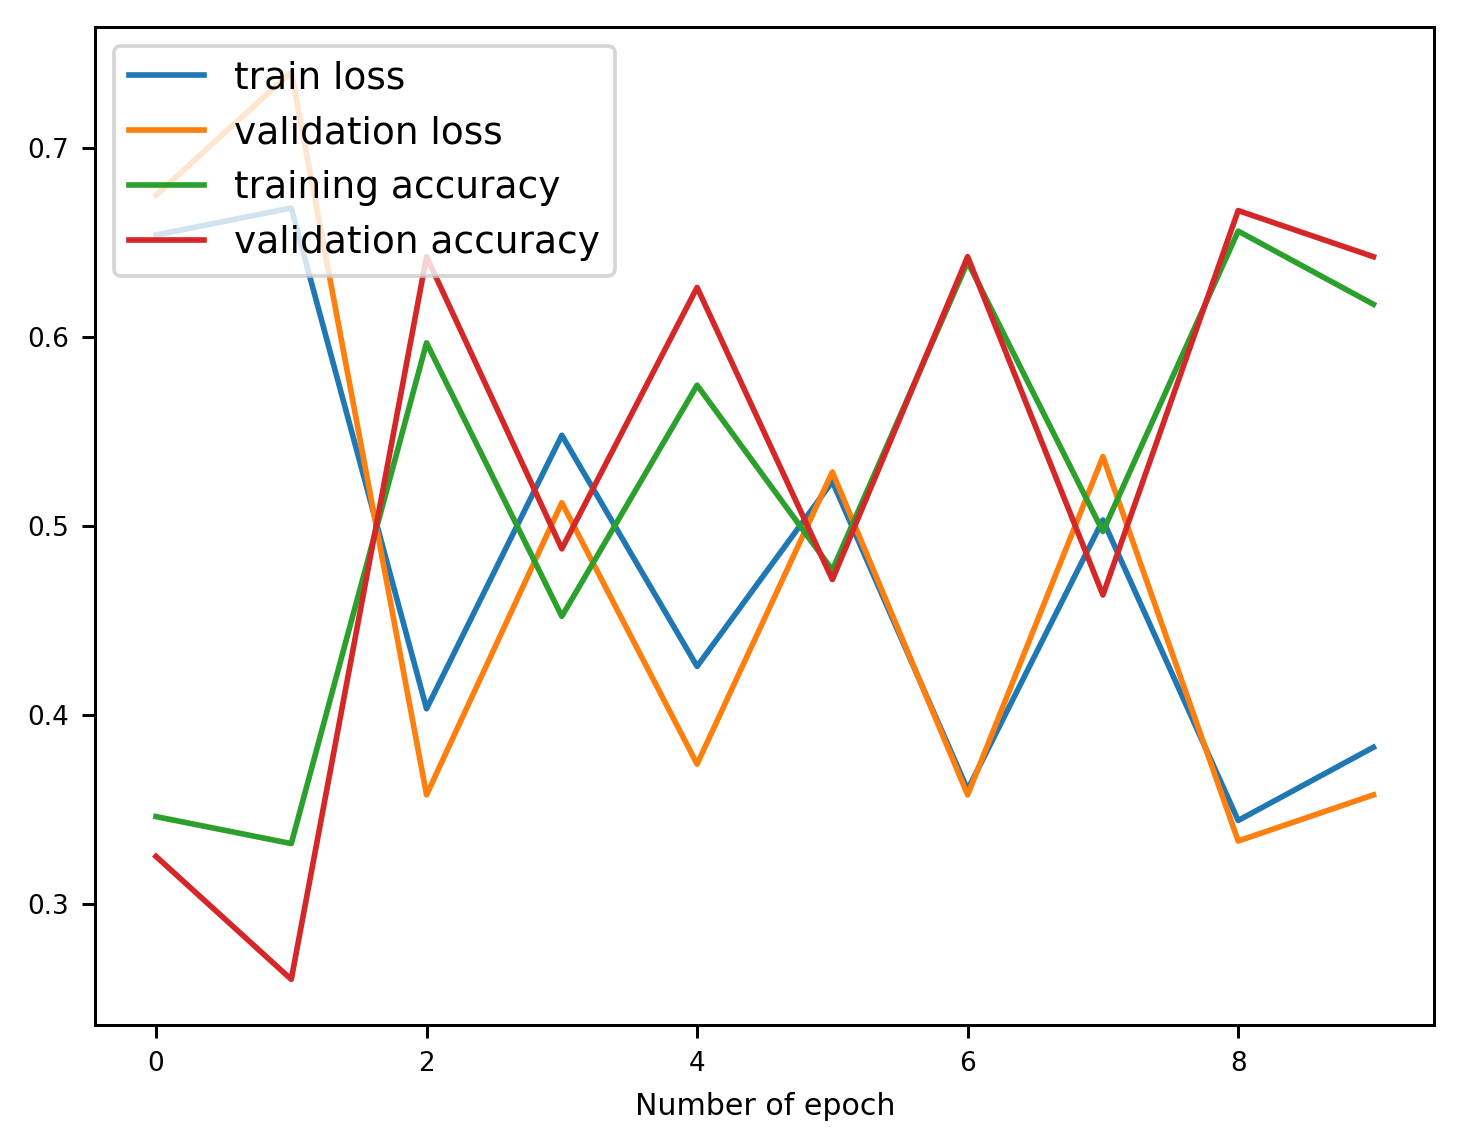

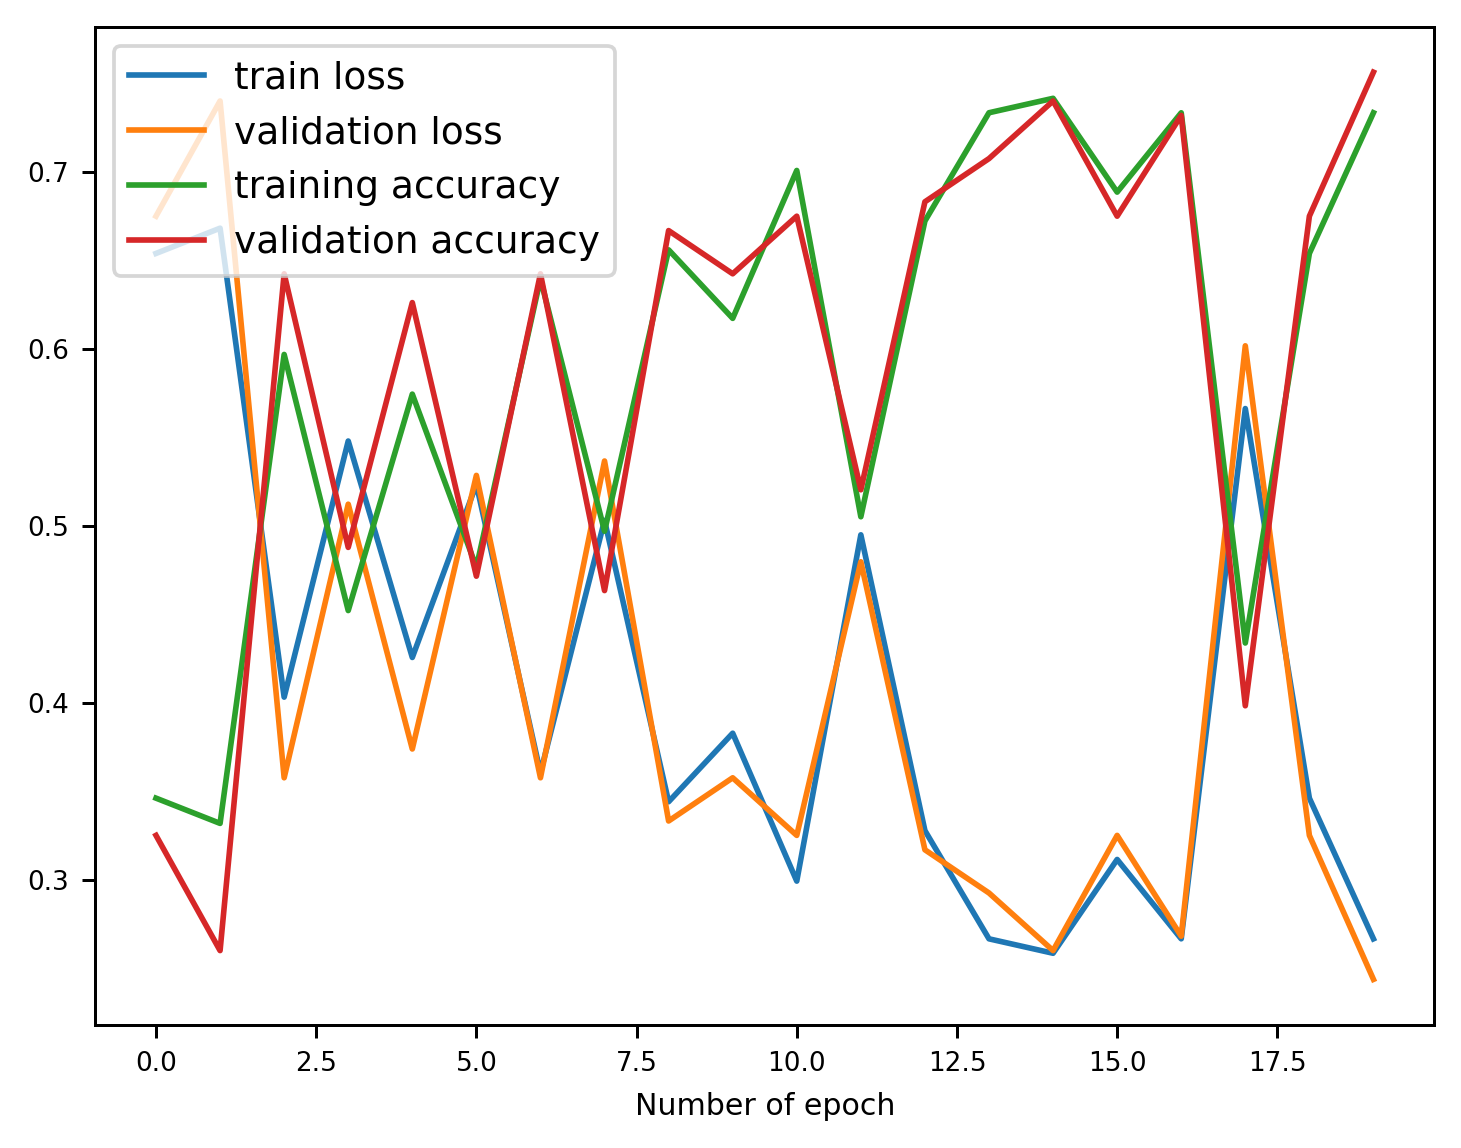

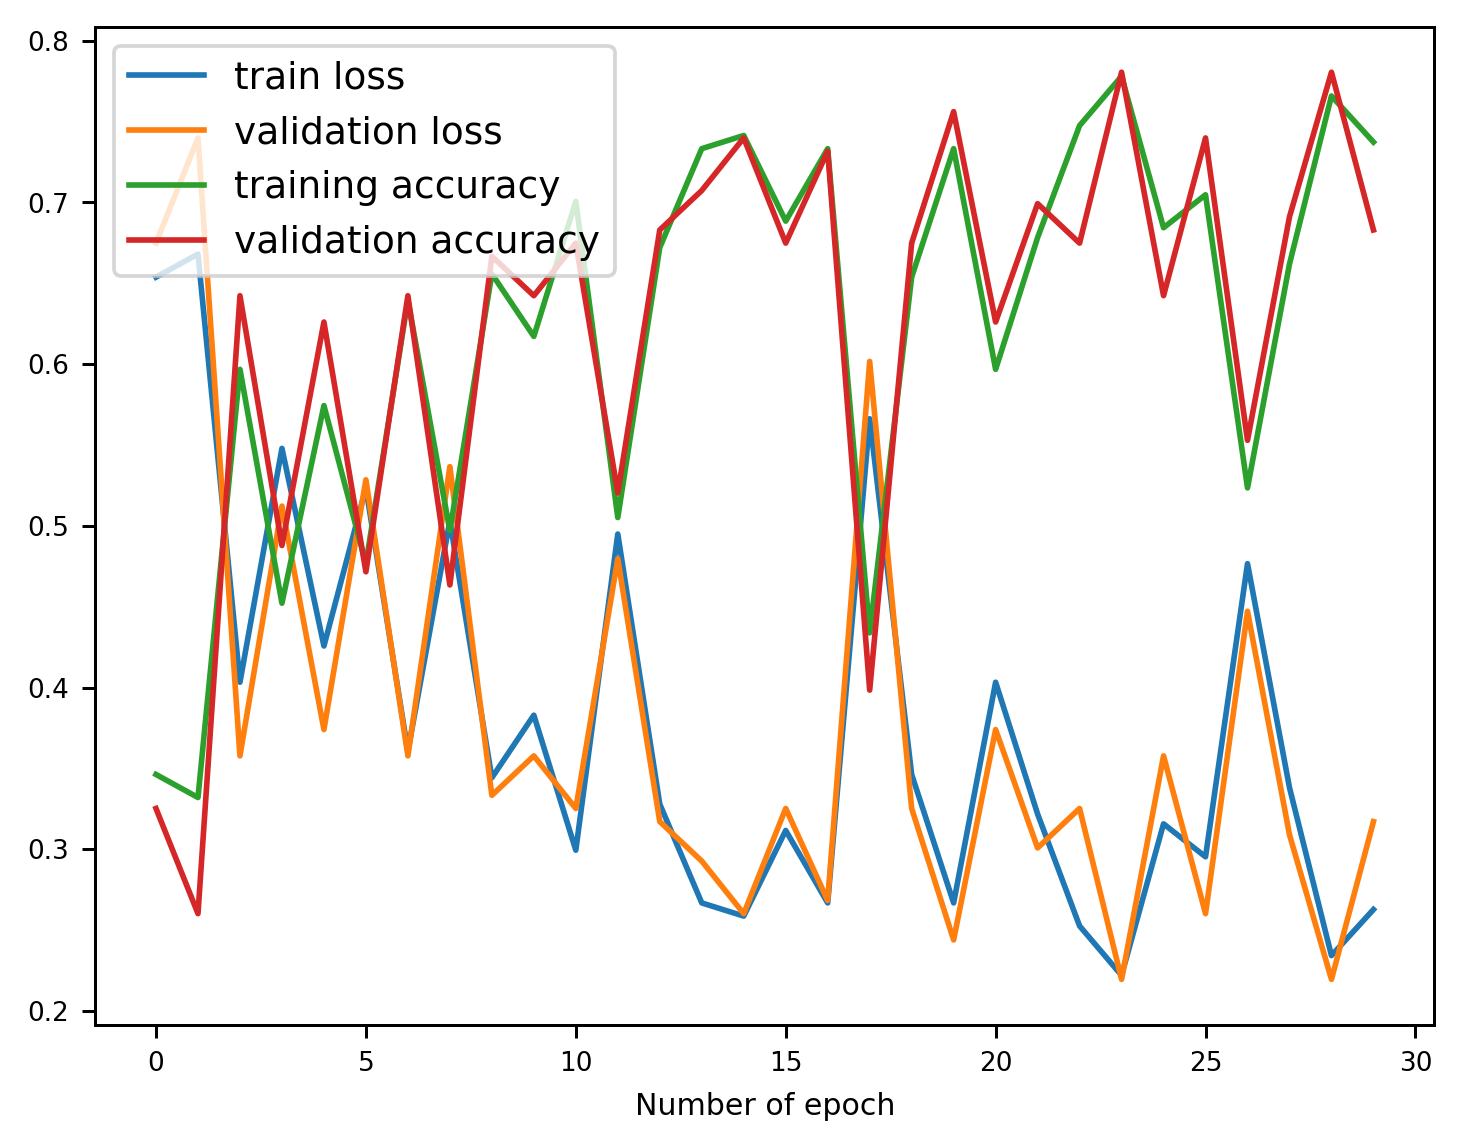

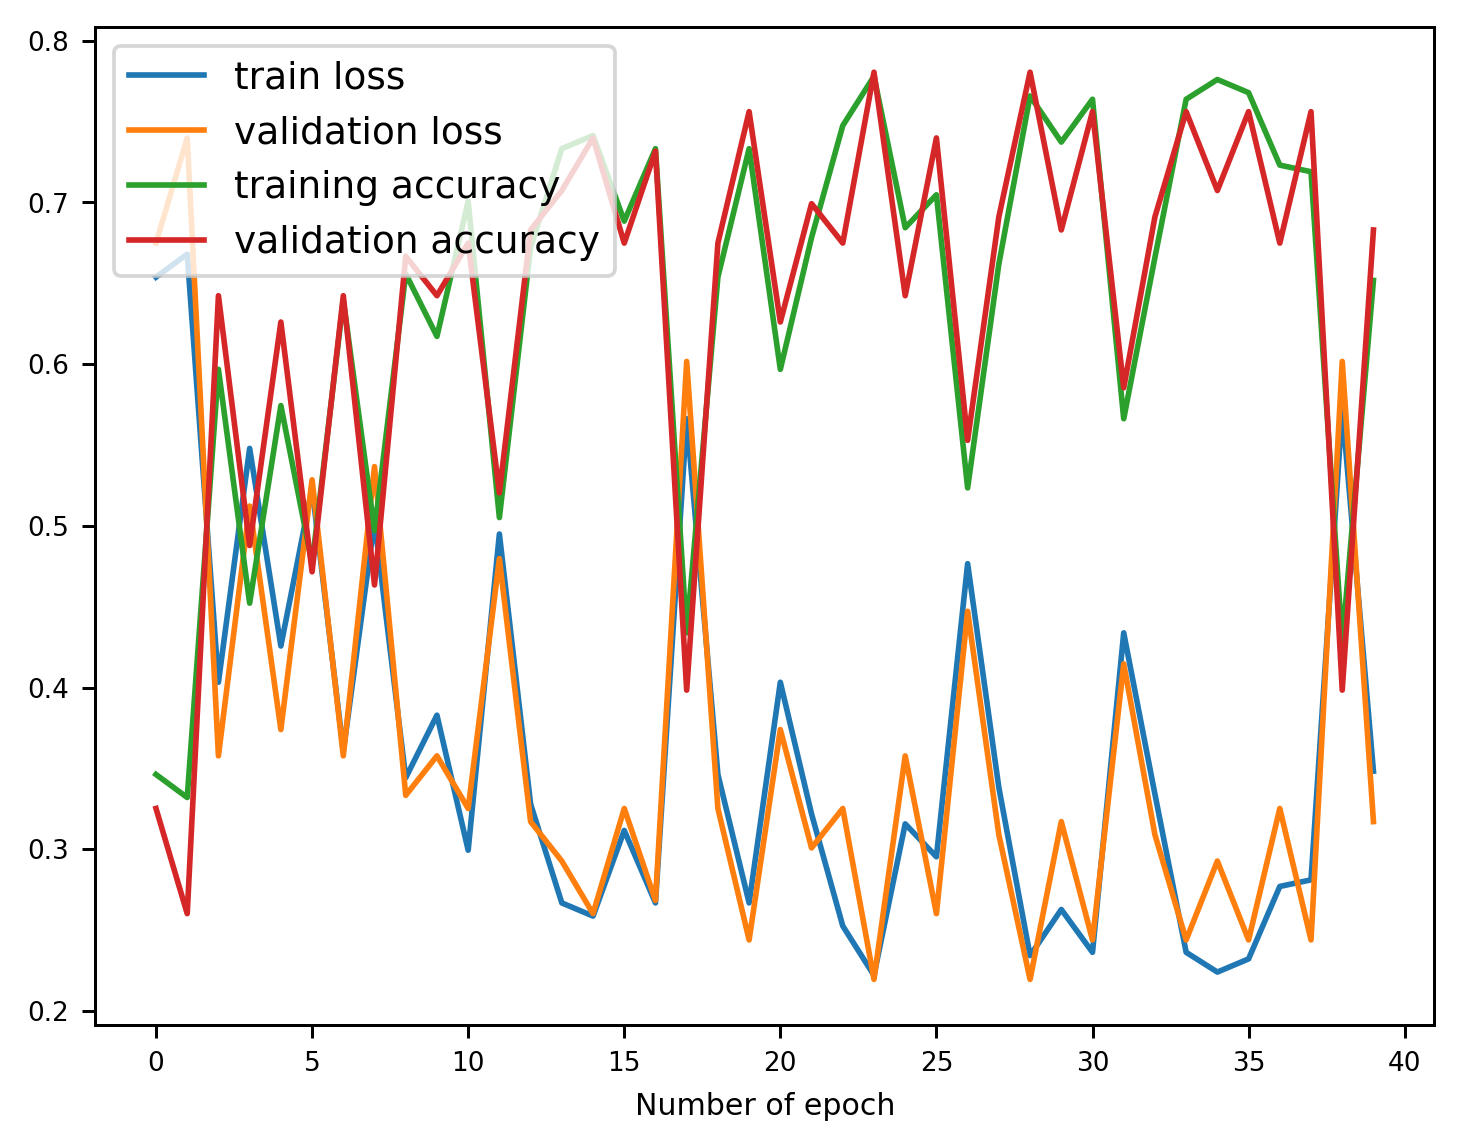

In [53]:
#Doing the experiment with perceptron WITHOUT bias
# giving the testing value of the hyperparameter
learning_rates=[0.001,0.01,0.1]
epoc = range(10,50,10)
detail_yes_bias = []
for lr in learning_rates:
    for epoch in epoc:

        np.random.seed(75) # Set a random seed for reproducibility
        weights=np.random.rand(8)
        best_accuracy = 0
        best_weights = None
        acc_train = []
        acc_val = []
        loss_train = []
        loss_val = []
        for i in range(epoch):
            predictions_train = [predict(row, weights) for row in train_features]
            predictions_val = [predict(row, weights) for row in val_features]

            training_acc = accuracy_score(train_labels, predictions_train)
            val_acc = accuracy_score(val_labels, predictions_val)
                
            acc_train.append(training_acc) # save each training accuracy into the list
            acc_val.append(val_acc)# save each validation accuracy into the list

            training_loss = loss_f(train_features, weights, train_labels)
            val_loss = loss_f(val_features, weights, val_labels)

            loss_train.append(training_loss)
            loss_val.append(val_loss)
            
            if val_acc > best_accuracy:
                best_accuracy = val_acc
                best_weights = weights
            
            weights = update_weights(features_final, labels_final, weights)

        # plt.plot(figsize=(12,15))
        plt.plot(np.arange(epoch),loss_train,label ="train loss")
        plt.plot(np.arange(epoch),loss_val,label ="validation loss")
        plt.plot(np.arange(epoch),acc_train,label ="training accuracy")
        plt.plot(np.arange(epoch),acc_val,label ="validation accuracy")
        plt.xlabel("Number of epoch")
        plt.legend(loc="upper left")
        
        plt.show()
        detail_yes_bias.append((best_accuracy,epoch,lr,best_weights))

In [54]:
detail_yes_bias.sort(reverse=True)
table_yes_bias=pd.DataFrame(detail_yes_bias,columns=["Val accuracy","Epoch","learning rate","weights"])
table_yes_bias

,Val accuracy,Epoch,learning rate,weights
0,0.780488,40,0.100,"[-0.19311869238075324, -0.44440246561055774, 0..."
1,0.780488,40,0.010,"[-0.19311869238075324, -0.44440246561055774, 0..."
2,0.780488,40,0.001,"[-0.19311869238075324, -0.44440246561055774, 0..."
3,0.780488,30,0.100,"[-0.1445304603807534, -0.4325833853305576, 0.1..."
4,0.780488,30,0.010,"[-0.1445304603807534, -0.4325833853305576, 0.1..."
5,0.780488,30,0.001,"[-0.1445304603807534, -0.4325833853305576, 0.1..."
6,0.756098,20,0.100,"[-0.07876573838075356, -0.5014979686005576, 0...."
7,0.756098,20,0.010,"[-0.07876573838075356, -0.5014979686005576, 0...."
8,0.756098,20,0.001,"[-0.07876573838075356, -0.5014979686005576, 0...."
9,0.666667,10,0.100,"[-0.10505986938075396, -0.3433221372605576, 0...."


In [56]:
# selected the top 5 highest validation accuracy
df_top = table_yes_bias.iloc[:5]
df_top

,Val accuracy,Epoch,learning rate,weights
0,0.780488,40,0.100,"[-0.19311869238075324, -0.44440246561055774, 0..."
1,0.780488,40,0.010,"[-0.19311869238075324, -0.44440246561055774, 0..."
2,0.780488,40,0.001,"[-0.19311869238075324, -0.44440246561055774, 0..."
3,0.780488,30,0.100,"[-0.1445304603807534, -0.4325833853305576, 0.1..."
4,0.780488,30,0.010,"[-0.1445304603807534, -0.4325833853305576, 0.1..."


In [58]:
#best weight
best_weights_final = df_top.iloc[0]["weights"]
best_weights_final

array([-0.19311869, -0.44440247,  0.10125816, -0.07689788,  0.00110317,
       -0.28825025, -0.2016145 , -0.12943672])

## Using the model with best hyperparameter for testing

test accuracy:  0.6948051948051948


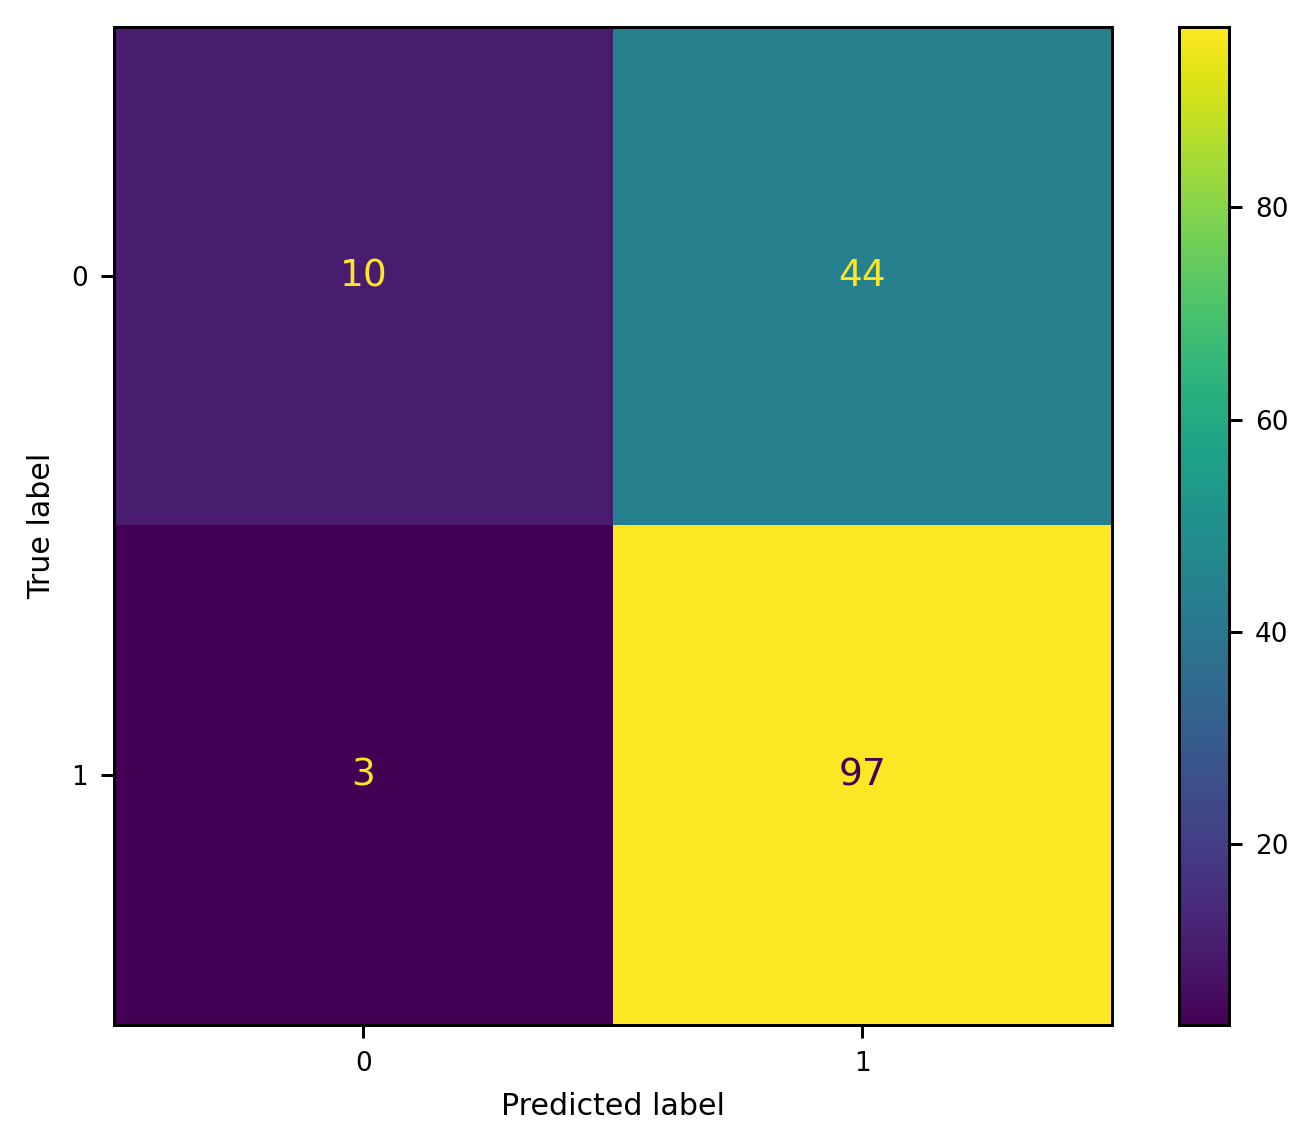

In [60]:
predictions_test = [predict(row, best_weights_final) for row in test_features]
test_acc = accuracy_score(test_labels, predictions_test)
test_loss = loss_f(test_features, best_weights_final, test_labels)

print("test accuracy: ",test_acc) 

cm = confusion_matrix (test_labels, predictions_test)
cm_table = ConfusionMatrixDisplay(cm)
cm_table.plot()
plt.show()

In [66]:
#Precision = true positive /true positive + false positive
#Recall = true positive /true positive+ false negative
#sensitivity = true positive /true positive+ false negative (same as recall calculation)
#specificity = true negative/true negative+false positive
#True_positive_rate = true positive /true positive+ false negative
#True_negative_rate = true negative/true negative+false positive

precision = precision_score(test_labels, predictions_test)
recall = recall_score(test_labels, predictions_test)
sensitivity = recall_score(test_labels, predictions_test)

# Using values from confusion matrix
specificity = 10 / (10 + 44)
balanced_accuracy = balanced_accuracy_score(test_labels, predictions_test)
print("precision: ",precision,"\nrecall: ", recall,"\nsensitivity: ",sensitivity,"\nspecificity: ",specificity)
print("Balanced accuracy",balanced_accuracy)

precision:  0.6879432624113475 
recall:  0.97 
sensitivity:  0.97 
specificity:  0.18518518518518517
Balanced accuracy 0.5775925925925925
